### Project Question

Select a dataset:
1. https://data.nasdaq.com/search
2. https://www.kaggle.com/datasets
3. https://data.gov/
4. https://medium.com/analytics-vidhya/top-100-open-source-datasets-for-data-science-cd5a
8d67cc3d

Requirements:
1. Pick a target column in the data that would make sense to predict from a marketing perspective. Could be pricing, volume, distributions, a category, and so on.
2. The dataset must be at least 2000 rows. More is better
3. The dataset must have at least 10 columns, with at least two string columns. More is
better

Perform initial analysis:
● Look at each of the columns, if available look at a data dictionary. Decide what columns look important and begin looking at statistical distributions, missing data, relevance, pair plots and so on.
● Analyze the relationship between your target column and all other columns, if necessary switch target columns or datasets
● Find three relationships in the dataset, at least one aggregate relationship and plot them. Describe the plots.
● With 3-5 sentences sum up your findings and articulate your plan for prediction.

Document / Submission:
● Put a link to your dataset, all your plots, and your analysis code in the github.
● In the readme put your all of your findings with your plots included as inline attachments
● Turn in your link via canvas, ensure read access is allowed / open to public

### Project Solution

### Dataset Description

**Problem: Intrusion Detection (Finding Anamolies) Analysis**

The KDD Cup 1999 dataset has been chosen for this data analysis project. This dataset was used in the fifth international conference for the data mining and knowledge discovery competition and contains a huge variety of network intrusion data that is simulated in an environment equipped with a military network setting.

KDD Cup 1999 dataset will be used to build a machine learning based intrusion detection problem to predict (classify) whether a network connection is "normal" or "abnormal". As this is a categorical prediction, this is a binary classification problem

The original source of the dataset is from the official KDD website (http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) and can also be found in the kaggle website. The dataset contains about 494,000 records of network readings with details like source bytes, destination connection information, type of attacks and so on. Below are the list of features (columns) and their data types in the dataset.

The task description can be found here - http://kdd.ics.uci.edu/databases/kddcup99/task.html

The data dictionary can be found here - http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

### 1. Dataset Loading

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("kddcup99_csv.csv")
df.shape

(494020, 42)

### 2. Dataset initial exploration

As seen from the data dictionary given the dataset website http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names , below are the set of categorical and continous columns.

#### 2.1 Categorical Columns

'protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login'

In [4]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

#### 2.2 Continuous Columns

In [5]:
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

#### 2.3 Target Variable

The target variable "label" contains all different types of malware attacks and also the value "normal" (i.e., not an attack) as shown below.

'normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'

All malware attacks are grouped (transformed) to the value "abnormal" to make this problem a binary classification problem instead of a multi-class classification.

In [22]:
target_variable = 'label'

In [23]:
df.shape

(494020, 42)

In [24]:
len(catg_cols) # Number of categorical columns

7

In [25]:
len(cont_cols)

34

In [26]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [27]:
# target variable distribution

In [28]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

As seen above, there are various type of malware attacks which can be grouped as "abnormal" to make this problem as binary classification problem

In [29]:
# group all malware attacks as "abnormal"

In [30]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [31]:
attack_types

['abnormal']

In [32]:
df['label'] = df['label'].replace(attack_types, 'abnormal')
df.shape

(494020, 42)

In [33]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

##### Target Variable histogram distribution

Text(0.5, 1.0, 'Target Classes Distribution')

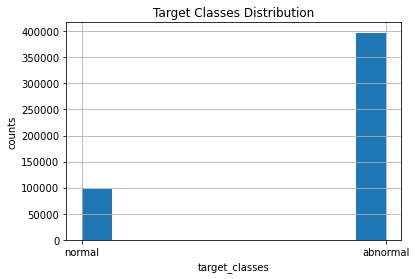

In [34]:
label_hist_plot = df['label'].hist()
label_hist_plot.set_xlabel('target_classes')
label_hist_plot.set_ylabel('counts')
label_hist_plot.set_title('Target Classes Distribution')

**Question-1:**
    
    Look at each of the columns, if available look at a data dictionary. Decide what columns look important and begin looking at statistical distributions, missing data, relevance, pair plots and so on.

##### 2. 4 Categorical Variables Distribution

In [35]:
catg_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'is_host_login',
 'is_guest_login']

In [36]:
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land               int64
logged_in          int64
is_host_login      int64
is_guest_login     int64
dtype: object

As seen from the above datatypes of the categorical columns,the column values are not strings. We need to convert them to string before performing any analysis

###### Fixing the data types of categorical columns

In [37]:
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)
df['land'] = df['land'].astype(str)
df['logged_in'] = df['logged_in'].astype(str)
df['is_host_login'] = df['is_host_login'].astype(str)
df['is_guest_login'] = df['is_guest_login'].astype(str)
df[catg_cols].dtypes

protocol_type     object
service           object
flag              object
land              object
logged_in         object
is_host_login     object
is_guest_login    object
dtype: object

##### Distribution Plots for categorical variables

In [38]:
df[catg_cols].describe() # summary of categorical columns

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login
count,494020,494020,494020,494020,494020,494020,494020
unique,3,66,11,2,2,1,2
top,icmp,ecr_i,SF,0,0,0,0
freq,283602,281400,378439,493998,420784,494020,493335


Text(0.5, 1.0, 'protocol_type distribution')

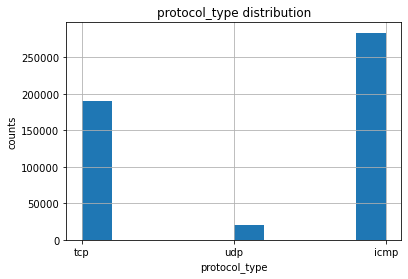

In [39]:
protocol_type_hist_plot = df['protocol_type'].hist()
protocol_type_hist_plot.set_xlabel('protocol_type')
protocol_type_hist_plot.set_ylabel('counts')
protocol_type_hist_plot.set_title('protocol_type distribution')

#####  service distribution

In [40]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
red_i           1
pm_dump         1
tftp_u          1
Name: service, Length: 66, dtype: int64

In [41]:
print(list(df['service'].unique())) # possible values for the column service

['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp', 'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data', 'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh', 'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf', 'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer', 'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard', 'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2', 'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm', 'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i', 'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i']


##### flag distribution

Text(0.5, 1.0, 'flag distribution')

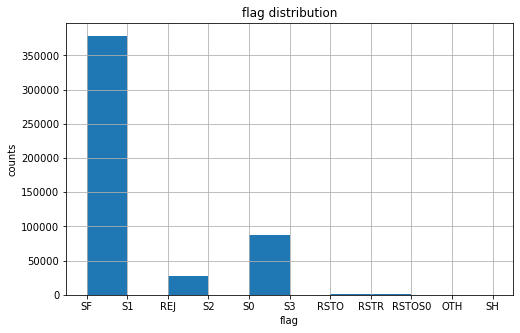

In [42]:
flag_hist_plot = df['flag'].hist(figsize=(8,5))
flag_hist_plot.set_xlabel('flag')
flag_hist_plot.set_ylabel('counts')
flag_hist_plot.set_title('flag distribution')

##### land distribution

Text(0.5, 1.0, 'flag distribution')

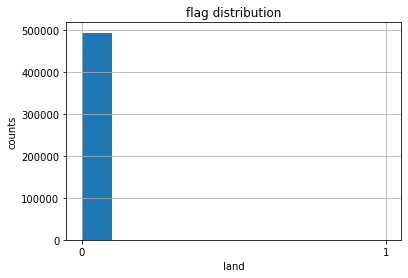

In [43]:
land_hist_plot = df['land'].hist()
land_hist_plot.set_xlabel('land')
land_hist_plot.set_ylabel('counts')
land_hist_plot.set_title('flag distribution')

In [49]:
df['land'].value_counts()

0    493998
1        22
Name: land, dtype: int64

##### logged_in

Text(0.5, 1.0, 'logged_in distribution')

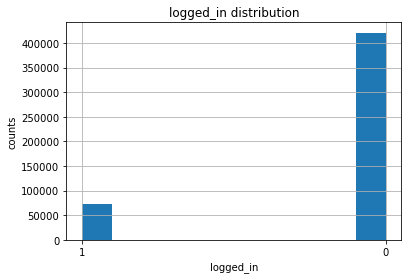

In [44]:
logged_in_hist_plot = df['logged_in'].hist()
logged_in_hist_plot.set_xlabel('logged_in')
logged_in_hist_plot.set_ylabel('counts')
logged_in_hist_plot.set_title('logged_in distribution')

##### is_guest_login

Text(0.5, 1.0, 'is_guest_login distribution')

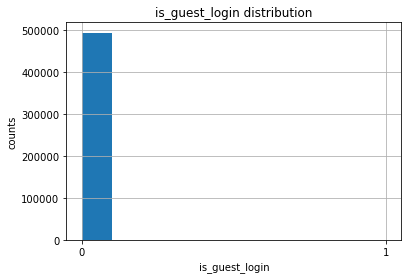

In [45]:
is_guest_login_hist_plot = df['is_guest_login'].hist()
is_guest_login_hist_plot.set_xlabel('is_guest_login')
is_guest_login_hist_plot.set_ylabel('counts')
is_guest_login_hist_plot.set_title('is_guest_login distribution')

In [48]:
df['is_guest_login'].value_counts()

0    493335
1       685
Name: is_guest_login, dtype: int64

##### is_host_login

Text(0.5, 1.0, 'is_host_login distribution')

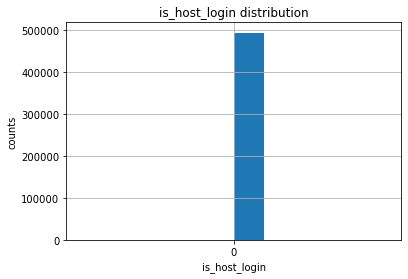

In [47]:
is_host_login_hist_plot = df['is_host_login'].hist()
is_host_login_hist_plot.set_xlabel('is_host_login')
is_host_login_hist_plot.set_ylabel('counts')
is_host_login_hist_plot.set_title('is_host_login distribution')

In [46]:
df['is_host_login'].value_counts()

0    494020
Name: is_host_login, dtype: int64

**Insight-1**

   - As seen from above categorical columns distribution, the column/feature 'is_host_login' will not be useful for the prediction as all of its values are 0s.

#### Continous Variables Distribution

In [50]:
df[cont_cols].dtypes # verify if all dtypes are either float or int, otherwise fix them

duration                         int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

In [51]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101230,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0
root_shell,494020.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494020.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0


**Insight-2**
     
- As seen from above statistics of the continous variables, the column/feature 'num_outbound_cmds' will be of no use for analysis/prediction since all of its values are 0s 

#### Columns with percentage of missing data

In [57]:
any(df.isna().any()) # as seen here there are no missing values in our dataset

False

In [58]:
df.isna().sum() # similary a different view to see the number of missing values in each column

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Insight-3**:
- There are no missing values in any column so as in whole dataset

#### Relvance Corelation between continous vairables

In [66]:
corr_matrix = df[cont_cols].corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.00,0.00,0.01,-0.00,0.00,0.01,0.01,0.06,0.02,0.06,0.06,0.07,-0.00,0.03,nan,-0.11,-0.08,-0.03,-0.03,0.01,0.01,0.02,0.05,-0.01,0.01,-0.12,-0.12,0.41,0.04,-0.01,-0.03,-0.03,0.01,0.01
src_bytes,0.00,1.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,nan,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
dst_bytes,0.01,-0.00,1.00,-0.00,0.02,0.00,0.05,0.02,0.03,0.08,0.02,0.00,0.00,0.01,nan,-0.04,-0.03,-0.01,-0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.05,-0.01,0.01,-0.01,-0.02,0.01,-0.01,-0.01,-0.00,-0.01
wrong_fragment,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,nan,-0.06,-0.05,-0.01,-0.02,-0.01,-0.01,0.02,-0.01,0.00,-0.01,-0.06,-0.05,0.07,-0.03,0.01,-0.02,-0.02,0.03,-0.01
urgent,0.00,-0.00,0.02,-0.00,1.00,0.00,0.14,0.01,0.03,-0.00,0.01,0.02,-0.00,0.02,nan,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
hot,0.01,0.00,0.00,-0.00,0.00,1.00,0.01,0.01,0.02,-0.00,0.00,0.03,0.01,0.00,nan,-0.07,-0.05,-0.02,-0.02,-0.01,-0.01,0.02,-0.00,0.00,-0.03,-0.04,-0.03,0.00,-0.05,-0.00,-0.02,-0.02,-0.01,-0.01
num_failed_logins,0.01,-0.00,0.05,-0.00,0.14,0.01,1.00,0.01,0.04,0.12,0.00,0.00,-0.00,0.00,nan,-0.02,-0.01,-0.00,-0.00,0.03,0.03,0.00,0.00,-0.00,-0.03,-0.02,0.00,0.00,-0.01,0.02,-0.00,-0.00,0.02,0.02
num_compromised,0.06,0.00,0.02,-0.00,0.01,0.01,0.01,1.00,0.26,0.70,0.99,0.01,0.01,0.41,nan,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
root_shell,0.02,-0.00,0.03,-0.00,0.03,0.02,0.04,0.26,1.00,0.30,0.26,0.09,0.17,0.15,nan,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,-0.02,-0.01,0.00,-0.00,-0.01,0.02,-0.00,-0.00,0.00,-0.00
su_attempted,0.06,-0.00,0.08,-0.00,-0.00,-0.00,0.12,0.70,0.30,1.00,0.70,0.01,0.02,0.32,nan,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.00,0.00,0.00,-0.00


In [67]:
corr_matrix_indices = corr_matrix.index
corr_matrix_columns = corr_matrix.columns

In [79]:
high_correlation = pd.DataFrame()
idx = 0
for corr_matr_index in corr_matrix_indices:
    for corr_matr_col in corr_matrix_columns:
        if corr_matr_index != corr_matr_col:
            cell_corr_val = corr_matrix.loc[corr_matr_index][corr_matr_col]
            if cell_corr_val > 0.8:
                #print(f"{corr_matr_index} is highly correlated to {corr_matr_col} {round(cell_corr_val, 2)}")
                high_correlation.loc[idx, 'feature_x'] = corr_matr_index
                high_correlation.loc[idx, 'feature_y'] = corr_matr_col
                high_correlation.loc[idx, 'high_corr_val'] = round(cell_corr_val,2)
                idx += 1
high_correlation.sort_values(by='high_corr_val', ascending=False)

,feature_x,feature_y,high_corr_val
27,dst_host_serror_rate,srv_serror_rate,1.00
28,dst_host_serror_rate,dst_host_srv_serror_rate,1.00
29,dst_host_srv_serror_rate,serror_rate,1.00
30,dst_host_srv_serror_rate,srv_serror_rate,1.00
6,serror_rate,srv_serror_rate,1.00
7,serror_rate,dst_host_serror_rate,1.00
8,serror_rate,dst_host_srv_serror_rate,1.00
9,srv_serror_rate,serror_rate,1.00
10,srv_serror_rate,dst_host_serror_rate,1.00
11,srv_serror_rate,dst_host_srv_serror_rate,1.00


**Insight-4:**
- There is some high correlatin found in the continous columns. Some of the correlated features can be removed inorder to avoid curse-of-dimensionality and multicollinearity problem
- Recommendation: Among all server rate columns, one server rate column will be sufficient since all of them are 100% correlated. Therefore, dst_host_serror_rate can be selected for final prediction modeling

#### Relevance between categorical variables using pairplot

In [80]:
import seaborn as sns

In [81]:
df[catg_cols]

,protocol_type,service,flag,land,logged_in,is_host_login,is_guest_login
0,tcp,http,SF,0,1,0,0
1,tcp,http,SF,0,1,0,0
2,tcp,http,SF,0,1,0,0
3,tcp,http,SF,0,1,0,0
4,tcp,http,SF,0,1,0,0
...,...,...,...,...,...,...,...
494015,tcp,http,SF,0,1,0,0
494016,tcp,http,SF,0,1,0,0
494017,tcp,http,SF,0,1,0,0
494018,tcp,http,SF,0,1,0,0


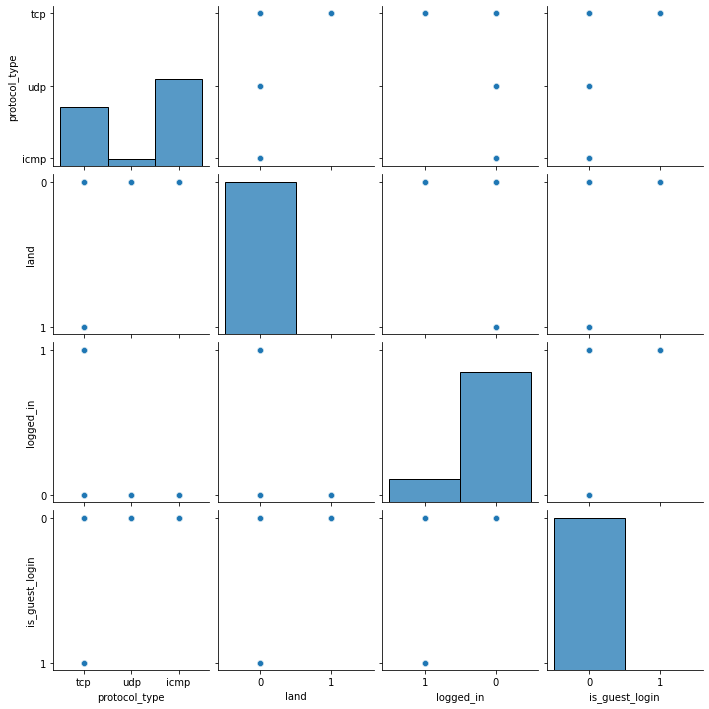

In [88]:
sns.pairplot(data=df,vars=['protocol_type', 'land','logged_in','is_guest_login'])

**Insight-5**
- As seen above, there is some relation (valid) between all categorical columns. Hence, these columns need not be dropped for analysis and prediction

**Question-2:**

Analyze the relationship between your target column and all other columns, if necessary switch target columns or datasets

##### Correlation between target column and input continous features

In [100]:
df_1 = df.copy()

In [103]:
df_1['label'].dtypes

dtype('O')

In [112]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

In [113]:
df['label'].replace('abnormal', 0,inplace=True)
df['label'].replace('normal', 1,inplace=True)

In [114]:
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

In [115]:
cont_cols_target = cont_cols + [target_variable]
corr_matrix_1 = df[cont_cols_target].corr()

In [116]:
'label' in corr_matrix_1.columns

True

In [119]:
pd.DataFrame(corr_matrix_1['label']).sort_values(by='label', ascending=False)

,label
label,1.000000
srv_diff_host_rate,0.364681
same_srv_rate,0.247404
dst_host_srv_diff_host_rate,0.204959
duration,0.118015
dst_host_diff_srv_rate,0.115902
dst_host_same_srv_rate,0.109958
dst_host_srv_count,0.062573
num_access_files,0.054268
dst_bytes,0.037709


**Insight-6**
- As seen above there are no as such very highly correlated independent variables (features) to the dependent variables. Therefoe, no subselection is required in this analysis 

##### Relationship categorical columns and Target Column

In [128]:
catg_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'is_host_login',
 'is_guest_login']

In [127]:
for val in [0,1]:
    print(f"Distribution of column protocol_type for {val}")
    print(df[df['label']==val]['protocol_type'].value_counts(normalize=True))

Distribution of column protocol_type for 0
icmp    0.711579
tcp     0.285454
udp     0.002967
Name: protocol_type, dtype: float64
Distribution of column protocol_type for 1
tcp     0.789621
udp     0.197138
icmp    0.013241
Name: protocol_type, dtype: float64


In [130]:
for val in [0,1]:
    print(f"Distribution of column flag for {val}")
    print(df[df['label']==val]['flag'].value_counts(normalize=True))

Distribution of column flag for 0
SF        0.722712
S0        0.219175
REJ       0.054277
RSTR      0.002198
RSTO      0.001291
SH        0.000270
RSTOS0    0.000028
OTH       0.000018
S2        0.000018
S3        0.000008
S1        0.000008
Name: flag, dtype: float64
Distribution of column flag for 1
SF      0.942751
REJ     0.054905
RSTO    0.000689
S1      0.000555
S0      0.000524
RSTR    0.000319
S2      0.000175
S3      0.000072
OTH     0.000010
Name: flag, dtype: float64


In [131]:
for val in [0,1]:
    print(f"Distribution of column service for {val}")
    print(df[df['label']==val]['service'].value_counts(normalize=True))

Distribution of column service for 0
ecr_i       0.708406
private     0.260942
http        0.006067
other       0.004045
eco_i       0.003158
              ...   
X11         0.000005
urp_i       0.000003
domain_u    0.000003
pm_dump     0.000003
IRC         0.000003
Name: service, Length: 62, dtype: float64
Distribution of column service for 1
http        0.636173
smtp        0.098667
private     0.075722
domain_u    0.060261
other       0.057897
ftp_data    0.039043
urp_i       0.005520
finger      0.004811
eco_i       0.003999
ntp_u       0.003906
ftp         0.003834
ecr_i       0.003547
auth        0.002262
telnet      0.002251
pop_3       0.000812
time        0.000535
IRC         0.000432
urh_i       0.000144
X11         0.000093
domain      0.000031
tim_i       0.000021
ssh         0.000010
tftp_u      0.000010
red_i       0.000010
shell       0.000010
Name: service, dtype: float64


In [132]:
for val in [0,1]:
    print(f"Distribution of column land for {val}")
    print(df[df['label']==val]['land'].value_counts(normalize=True))

Distribution of column land for 0
0    0.999947
1    0.000053
Name: land, dtype: float64
Distribution of column land for 1
0    0.99999
1    0.00001
Name: land, dtype: float64


In [133]:
for val in [0,1]:
    print(f"Distribution of column logged_in for {val}")
    print(df[df['label']==val]['logged_in'].value_counts(normalize=True))

Distribution of column logged_in for 0
0    0.991687
1    0.008313
Name: logged_in, dtype: float64
Distribution of column logged_in for 1
1    0.718957
0    0.281043
Name: logged_in, dtype: float64


In [134]:
for val in [0,1]:
    print(f"Distribution of column is_guest_login for {val}")
    print(df[df['label']==val]['is_guest_login'].value_counts(normalize=True))

Distribution of column is_guest_login for 0
0    0.999209
1    0.000791
Name: is_guest_login, dtype: float64
Distribution of column is_guest_login for 1
0    0.996186
1    0.003814
Name: is_guest_login, dtype: float64


These are some interesting relationships to capture. At this point no feature reduction is required for the above cateorical columns relationship with target columns

**Question-3**

Find three relationships in the dataset, at least one aggregate relationship and plot them. Describe the plots.

In [135]:
catg_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'is_host_login',
 'is_guest_login']

In [141]:
# aggregate realtionship - 1
grouped_mean_duration_by_service = df.groupby(by='service').agg({'duration': 'mean'}).reset_index().rename(columns={'duration': 'mean_duration'})

In [143]:
grouped_mean_duration_by_service.sort_values(by='mean_duration', ascending=False)

,service,mean_duration
0,IRC,7343.093023
40,other,2815.952605
56,telnet,890.208577
18,ftp,423.139098
54,supdup,387.485714
...,...,...
25,iso_tsap,0.000000
23,http_443,0.000000
21,hostnames,0.000000
46,red_i,0.000000


<AxesSubplot:title={'center':'Aggregate Relationship service vs mean_duration'}, xlabel='service', ylabel='mean_duration'>

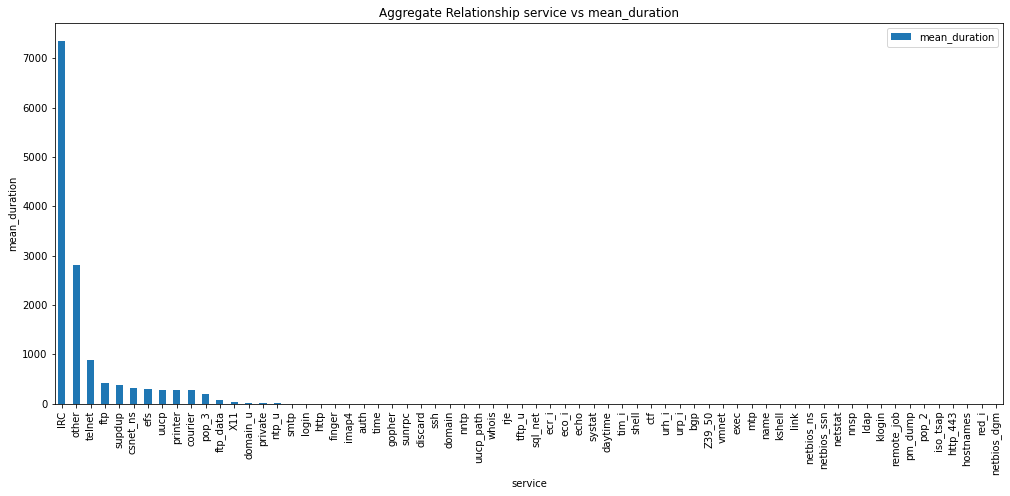

In [148]:
grouped_mean_duration_by_service.sort_values(by='mean_duration', ascending=False).plot(kind='bar',x='service',y='mean_duration',
                                                                                      figsize=(17,7),ylabel='mean_duration',
                                                                                      title='Aggregate Relationship service vs mean_duration')

**Insight-7**
- As seen in the above, plot, the services IRC, telnet have higher mean duration times compared to other type of services

<AxesSubplot:xlabel='duration', ylabel='count'>

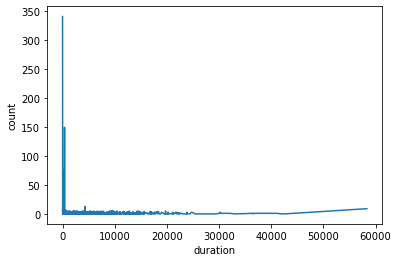

In [152]:
# line plot
sns.lineplot(data=df.sort_values(by='duration'), x="duration", y="count")

**Insight-8**
- As seen above, as duration increases the count of connection gets reduced

In [161]:
# line plot

df.groupby(by='flag').agg({'service': pd.Series.nunique}).reset_index().rename(columns={'service': 'n_services'}).sort_values(by='n_services')

,flag,n_services
3,RSTOS0,1
0,OTH,2
7,S2,4
8,S3,6
10,SH,6
6,S1,9
2,RSTO,22
4,RSTR,30
9,SF,32
1,REJ,41


**Insight-9**
- As seen above the flag tupes S0, REJ, SF, RSTR have higher number of unique services being utilized for the malware connections